In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime

# Correlation and Auto Correlation


## correlations
    What is correlation ?
    Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.



In [28]:
s = pd.read_csv('../data/stock_data.csv', parse_dates= [0], index_col=[0])

In [29]:
#Investigate if the data has missing values
# If less drop or else try imputing using some method

In [30]:
# Computes pairwise correlation of columns, excluding NA/null values.
# various methods available are: {‘pearson’, ‘kendall’, ‘spearman’} or callable
# Pearson correlation: measures the linear association between continuous variables.
# Spearman's rank correlation: measures monotonic association (only strictly increasing or decreasing, but not mixed) 
# This makes it appropriate to use with both continuous and discrete data.
# Kendall correlation: works well for discrete data
s.corr()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
AA,1.000000,-0.136897,0.940204,-0.072867,0.302777,0.543281,0.496932,0.778118,0.667091
AAPL,-0.136897,1.000000,-0.022671,0.957575,0.685515,0.419330,0.644903,0.466928,0.172266
GE,0.940204,-0.022671,1.000000,-0.004338,0.385151,0.629383,0.618583,0.847320,0.693433
IBM,-0.072867,0.957575,-0.004338,1.000000,0.723537,0.391174,0.628398,0.483436,0.254614
JNJ,0.302777,0.685515,0.385151,0.723537,1.000000,0.659579,0.824005,0.708609,0.365483
MSFT,0.543281,0.419330,0.629383,0.391174,0.659579,1.000000,0.775349,0.813296,0.350523
PEP,0.496932,0.644903,0.618583,0.628398,0.824005,0.775349,1.000000,0.884069,0.436561
SPX,0.778118,0.466928,0.847320,0.483436,0.708609,0.813296,0.884069,1.000000,0.693395
XOM,0.667091,0.172266,0.693433,0.254614,0.365483,0.350523,0.436561,0.693395,1.000000


<AxesSubplot:>

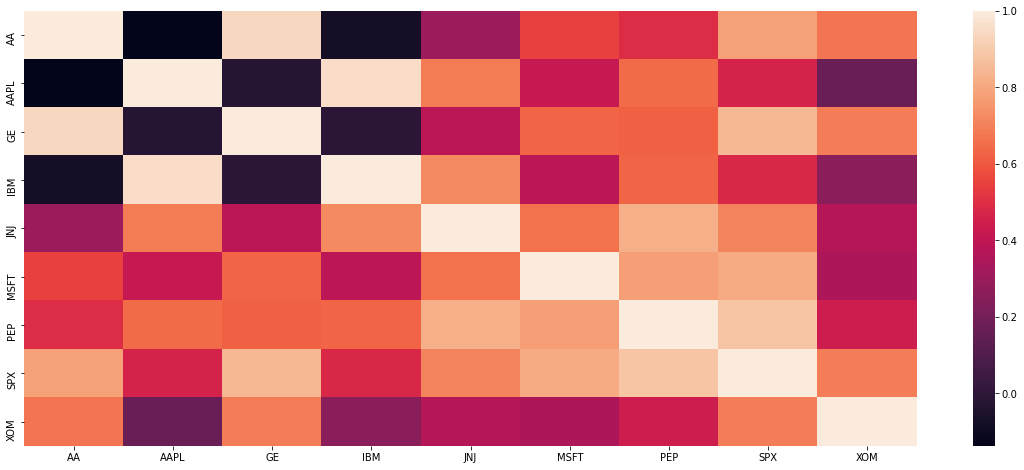

In [31]:
#Plotting the values in a heatmap
sns.heatmap(s.corr())

In [32]:
#relation between two can be found as
s['AAPL'].corr(s['AAPL'])

1.0

## auto correlation

    correlation between the elements of a series and others from the same series separated from them by a given interval.

In [44]:
from statsmodels.tsa.stattools import *
from statsmodels.graphics.tsaplots import *

In [45]:
#The NumPy linspace function (sometimes called np.linspace) is a tool in Python for creating numeric sequences.
# Trigonometric sine
data = np.sin(np.linspace(start=0,stop=100,num=100))

In [46]:
# Autocorrelation function for 1d arrays.
# correlation between the elements of a series and others from the same series separated from them by a given interval.
ac_res = acf(data, nlags=100)


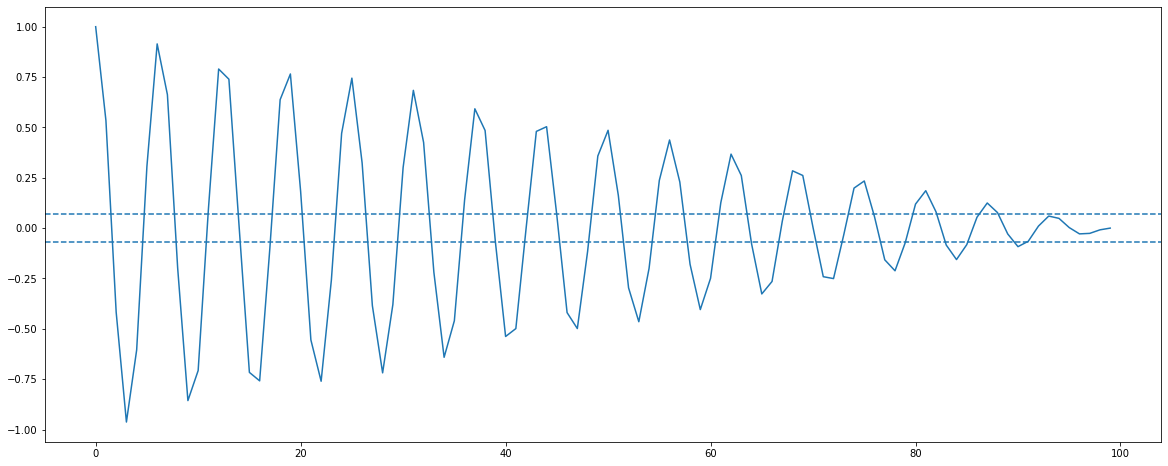

In [47]:
plt.plot(ac_res)
plt.axhline(y=-1.96/np.sqrt(800), linestyle='--')
plt.axhline(y=1.96/np.sqrt(800), linestyle='--')

In [48]:
ap = pd.read_csv('../data/AirPassengers.csv', header=0, parse_dates=[0], index_col=0)

<AxesSubplot:xlabel='Month'>

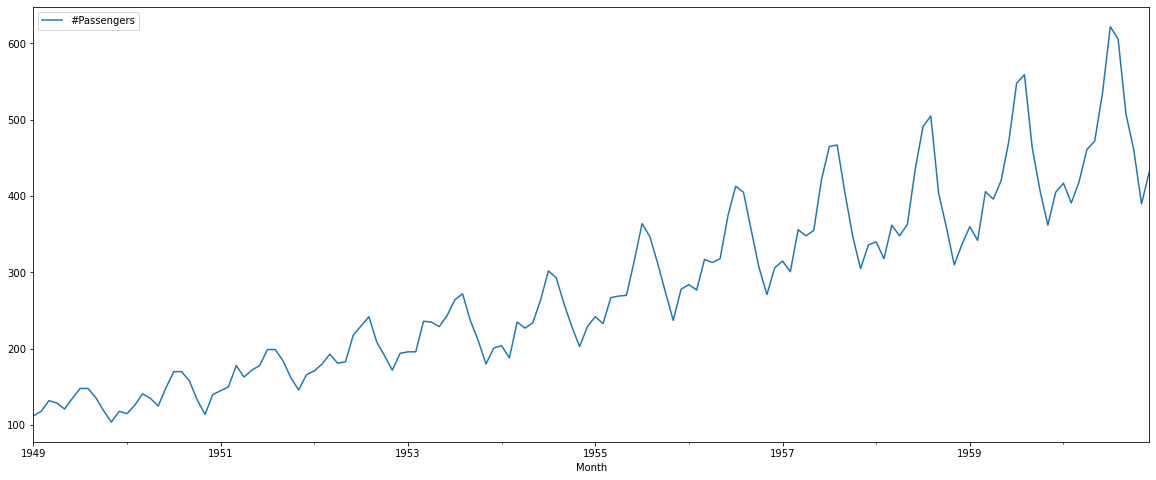

In [49]:
ap.plot()

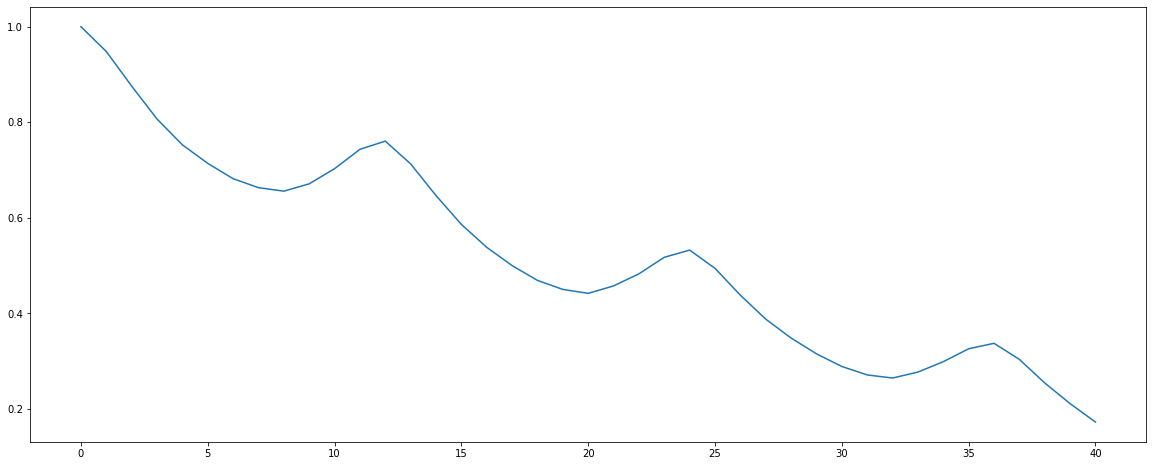

In [50]:
plt.plot(acf(ap))

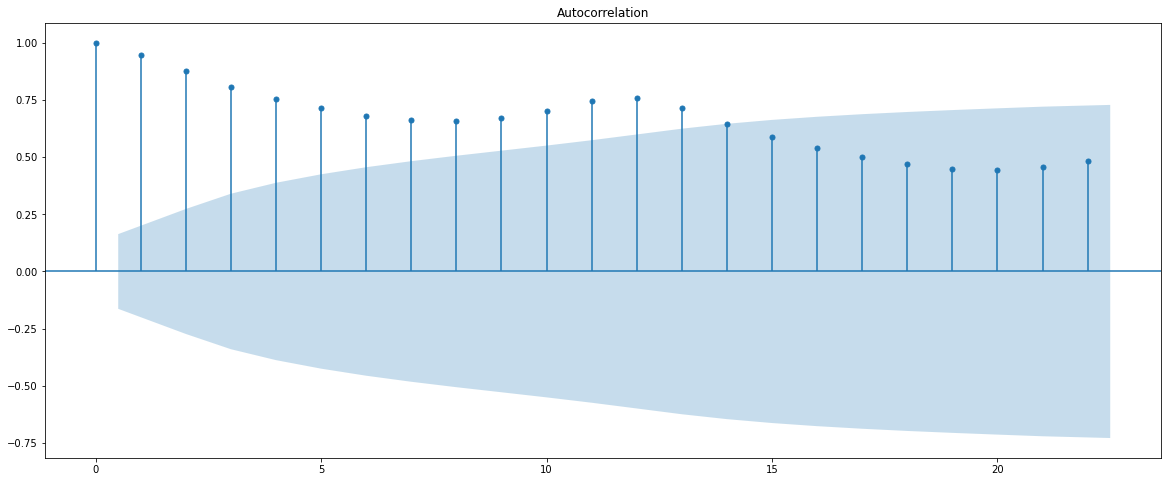

In [51]:
ac_plot = plot_acf(ap)

In [52]:
dtrend_ap = np.log(ap).diff().dropna()

<AxesSubplot:xlabel='Month'>

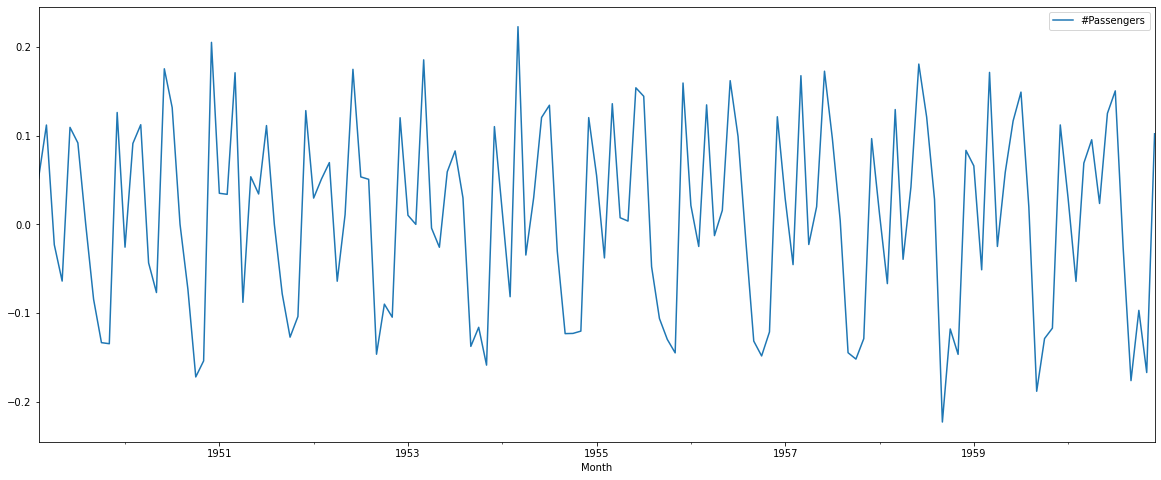

In [53]:
dtrend_ap.plot()

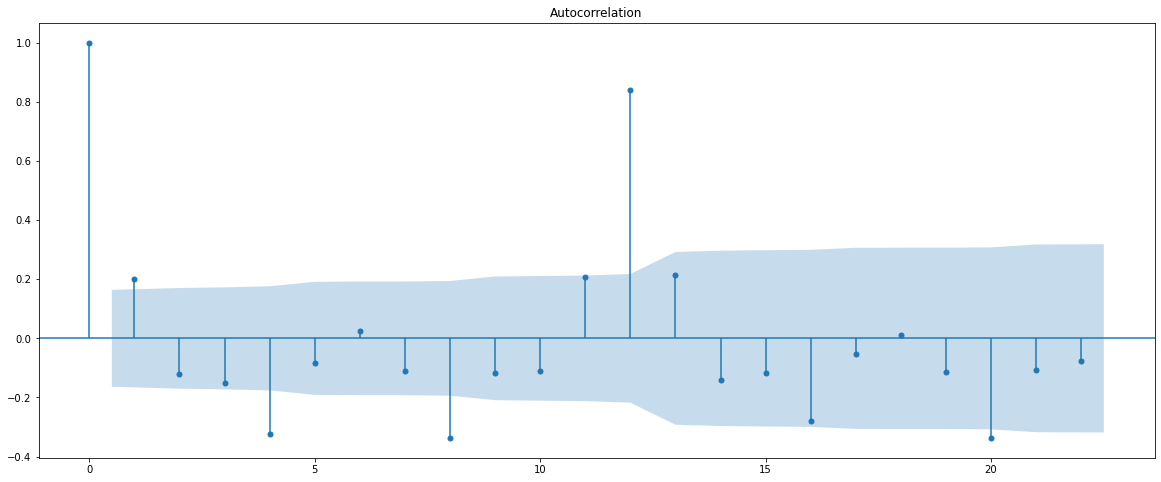

In [54]:
acf_plot = plot_acf(dtrend_ap)